# Map tile acquisition

Demonstrates cartopy's ability to draw map tiles which are downloaded on
demand from the MapQuest tile server. Internally these tiles are then combined
into a single image and displayed in the cartopy GeoAxes.

In [1]:
import matplotlib.pyplot as plt
from matplotlib.transforms import offset_copy

import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt

%matplotlib inline

plt.rcParams['figure.figsize'] = 15,10

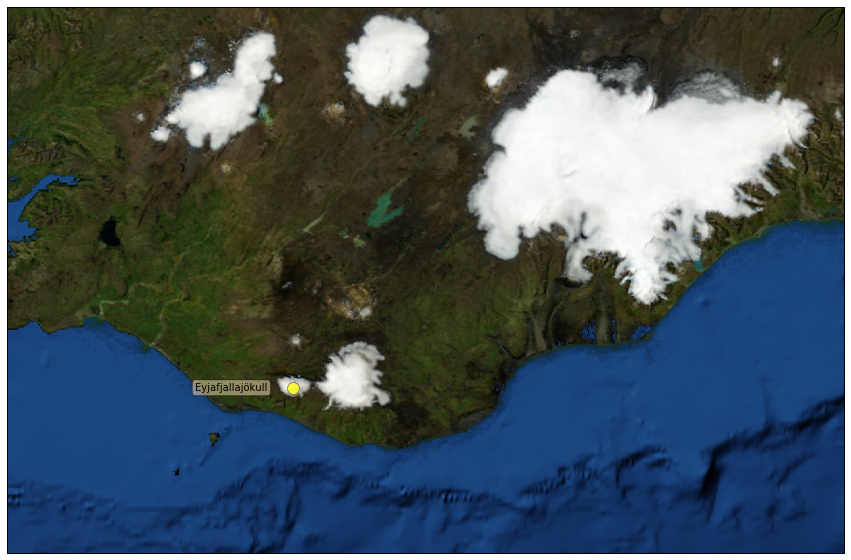

In [2]:
# Create a MapQuest open aerial instance.
map_quest_aerial = cimgt.MapQuestOpenAerial()

# Create a GeoAxes in the tile's projection.
ax = plt.axes(projection=map_quest_aerial.crs)

# Limit the extent of the map to a small longitude/latitude range.
ax.set_extent([-22, -15, 63, 65])

# Add the MapQuest data at zoom level 8.
ax.add_image(map_quest_aerial, 8)

# Add a marker for the Eyjafjallajökull volcano.
plt.plot(-19.613333, 63.62, marker='o', color='yellow', markersize=12,
         alpha=0.7, transform=ccrs.Geodetic())

# Use the cartopy interface to create a matplotlib transform object
# for the Geodetic coordinate system. We will use this along with
# matplotlib's offset_copy function to define a coordinate system which
# translates the text by 25 pixels to the left.
geodetic_transform = ccrs.Geodetic()._as_mpl_transform(ax)
text_transform = offset_copy(geodetic_transform, units='dots', x=-25)

# Add text 25 pixels to the left of the volcano.
plt.text(-19.613333, 63.62, u'Eyjafjallajökull',
         verticalalignment='center', horizontalalignment='right',
         transform=text_transform,
         bbox=dict(facecolor='wheat', alpha=0.5, boxstyle='round'))
plt.show()